The files processed in this notebook were obtained from [https://github.com/intelligent-environments-lab/CityLearn](https://github.com/intelligent-environments-lab/CityLearn)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
building_load_profile = pd.read_csv('raw/Building_1.csv')
building_load_profile['Load [kWh]'] = building_load_profile['Equipment Electric Power [kWh]'] + building_load_profile['DHW Heating [kWh]'] + building_load_profile['Cooling Load [kWh]']
building_load_profile = building_load_profile[['Month', 'Hour', 'Day Type', 'Load [kWh]']]

In [4]:
building_load_profile.to_csv('preprocessed/electricity_load_profile.csv')

In [5]:
solar_generation_profile = pd.read_csv('raw/solar_generation_1kW.csv')
solar_generation_profile['Inverter Power (W)'] = solar_generation_profile['Hourly Data: AC inverter power (W)']
solar_generation_profile = solar_generation_profile[['Inverter Power (W)']]

In [6]:
solar_generation_profile.to_csv('preprocessed/solar_generation_profile.csv')

In [7]:
weather_profile = pd.read_csv('raw/weather_data.csv')
weather_profile

,Outdoor Drybulb Temperature [C],Outdoor Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Outdoor Relative Humidity [%],12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,17.81,68.12,0.0,0.0,16.19,25.29,18.31,76.47,44.10,67.32,0.00,171.45,0.0,0.00,577.41,0.0
1,16.14,74.75,0.0,0.0,17.20,25.96,17.25,72.65,41.52,72.46,41.67,132.00,0.0,65.46,708.69,0.0
2,16.10,75.88,0.0,0.0,18.76,25.90,15.07,67.54,41.96,82.54,101.65,118.76,0.0,329.89,595.70,0.0
3,16.10,78.25,0.0,0.0,21.43,26.08,15.21,56.74,42.34,80.86,151.99,69.99,0.0,436.51,582.30,0.0
4,16.16,77.75,0.0,0.0,23.37,25.84,12.91,50.20,42.92,93.52,187.61,34.75,0.0,486.97,329.68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,13.07,82.50,0.0,0.0,12.27,10.88,11.92,92.88,87.28,89.53,0.00,9.89,0.0,0.00,0.00,0.0
8756,12.14,85.88,0.0,0.0,11.94,10.43,11.23,91.78,88.89,91.67,0.00,35.78,0.0,0.00,0.00,0.0
8757,11.18,91.38,0.0,0.0,10.85,11.33,9.94,92.69,86.46,99.80,0.00,109.93,0.0,0.00,0.00,0.0
8758,10.18,97.75,0.0,0.0,10.70,11.23,10.10,90.20,89.36,98.30,0.00,119.34,0.0,0.00,1.26,0.0


In [8]:
building_load_profile

,Month,Hour,Day Type,Load [kWh]
0,1,1,8,9.89
1,1,2,8,9.08
2,1,3,8,8.22
3,1,4,8,8.57
4,1,5,8,8.93
...,...,...,...,...
8755,12,20,1,9.37
8756,12,21,1,10.13
8757,12,22,1,10.17
8758,12,23,1,9.51


In [9]:
(solar_generation_profile['Inverter Power (W)']*140)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Inverter Power (W), Length: 8760, dtype: float64

In [10]:
building_load_profile[['Load [kWh]']]

,Load [kWh]
0,9.89
1,9.08
2,8.22
3,8.57
4,8.93
...,...
8755,9.37
8756,10.13
8757,10.17
8758,9.51


In [59]:
external_generation_profile = pd.read_csv('raw/timedata.csv')
target_column = 'AT_price_day_ahead'
external_generation_profile = external_generation_profile[[target_column]]
min_price = external_generation_profile[target_column].min()
external_generation_profile[target_column] = external_generation_profile[target_column] - min_price + 5
external_generation_profile[target_column] = external_generation_profile[target_column].fillna(external_generation_profile[target_column].mean())
external_generation_profile = external_generation_profile.rename(columns={target_column: 'External Cost [$/kWh]'})
external_generation_profile.to_csv('preprocessed/external_generation_profile.csv')
external_generation_profile

,External Cost [$/kWh]
0,63.0
1,73.0
2,69.0
3,66.0
4,63.0
...,...
8755,60.0
8756,57.0
8757,57.0
8758,54.0


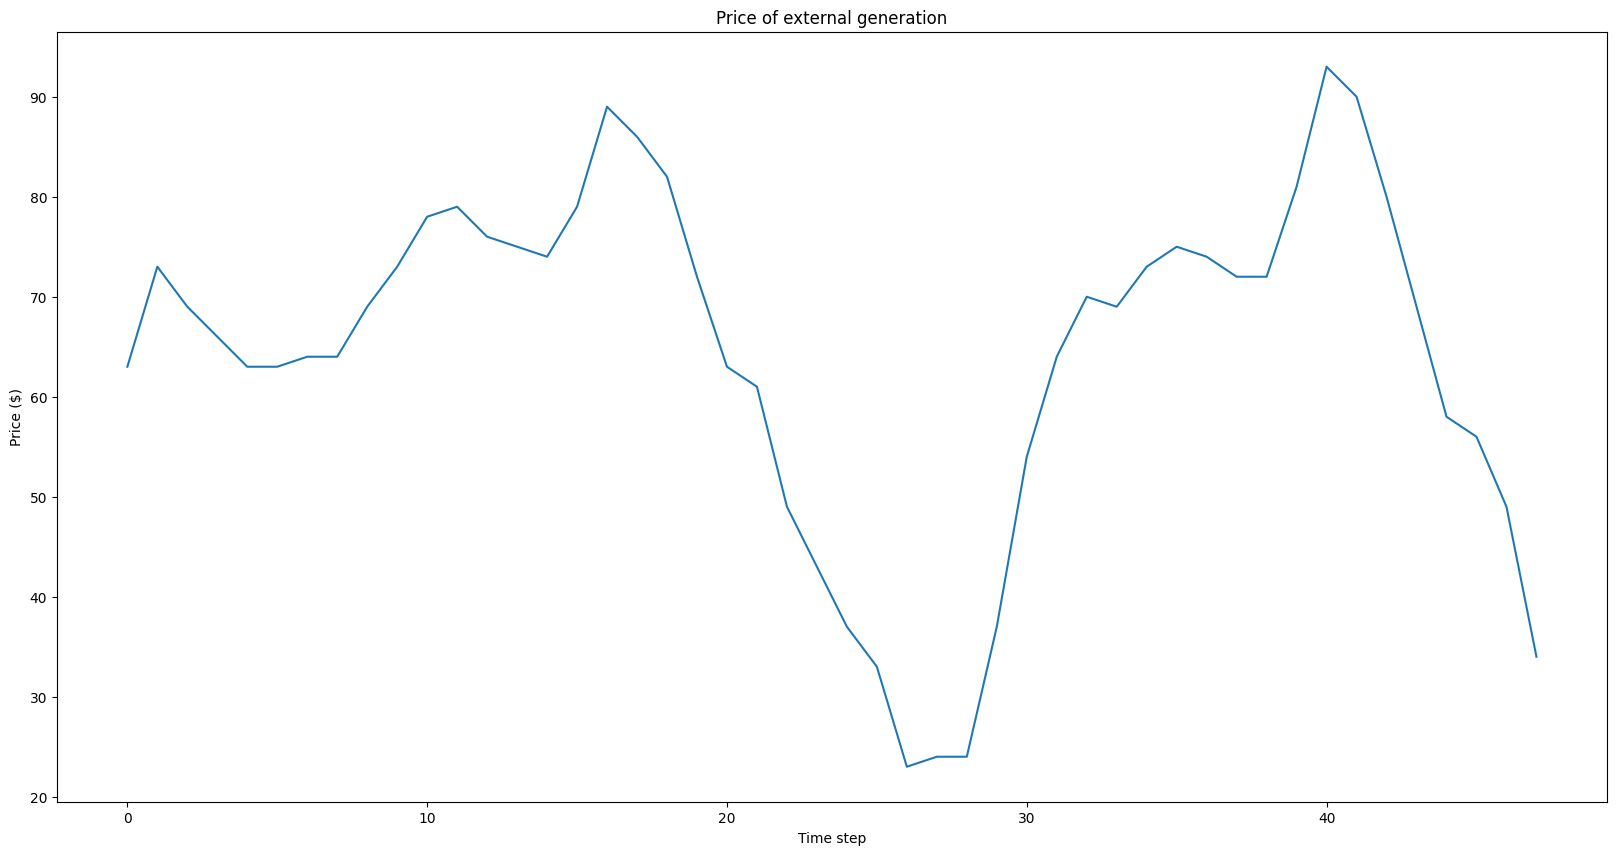

In [54]:
# plot the data
plt.figure(figsize=(20, 10))
plt.plot(external_generation_profile[target_column][:48])
plt.xlabel('Time step')
plt.ylabel('Price ($)')
plt.title('Price of external generation')
plt.show()


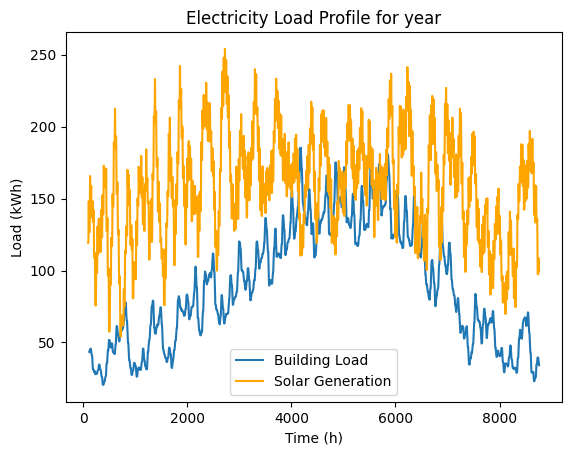

In [24]:
# plot several profiles each for whole year
plt.plot(building_load_profile[['Load [kWh]']].rolling(120).mean())
plt.plot(solar_generation_profile[['Inverter Power (W)']].rolling(100).mean(), color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Load (kWh)')
plt.title('Electricity Load Profile for year')
plt.legend(['Building Load', 'Solar Generation'])
plt.show()

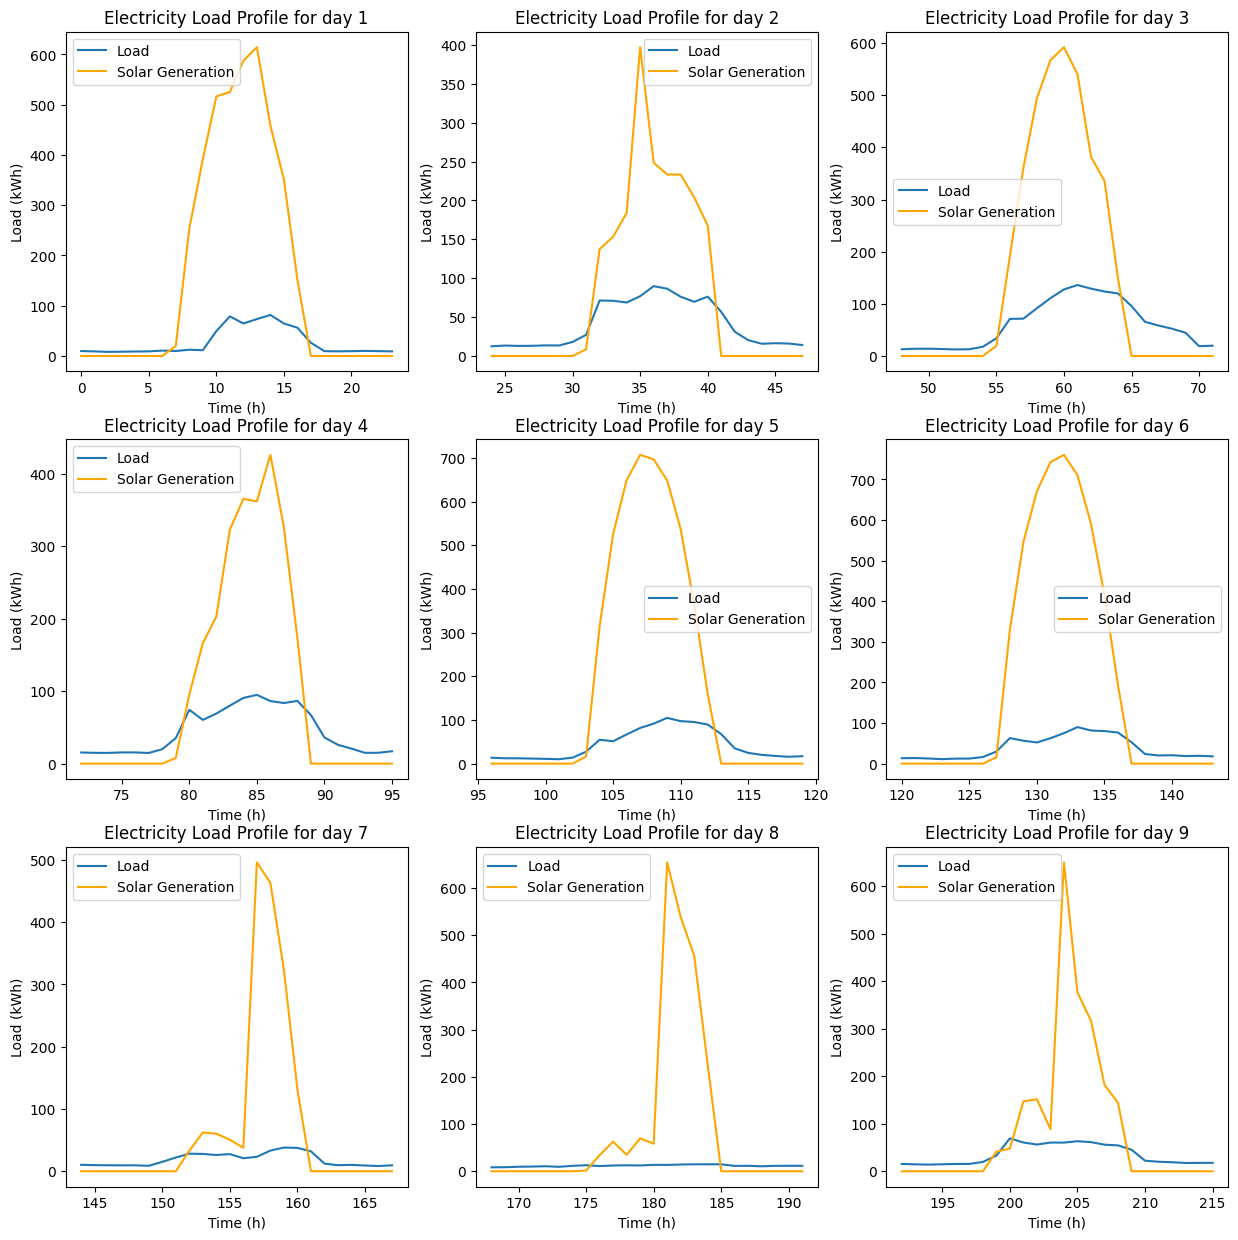

In [23]:
# plot several profiles each for one day in a grid plot
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axs[i, j].plot(building_load_profile[['Load [kWh]']].iloc[24 * (3 * i + j):24 * (3 * i + j + 1)])
        axs[i, j].plot(solar_generation_profile[['Inverter Power (W)']].iloc[24 * (3 * i + j):24 * (3 * i + j + 1)], color='orange')
        axs[i, j].set_xlabel('Time (h)')
        axs[i, j].set_ylabel('Load (kWh)')
        axs[i, j].set_title('Electricity Load Profile for day ' + str(3 * i + j + 1))
        axs[i, j].legend(['Load', 'Solar Generation'])
# show legend
plt.show()